# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages"

# Restart the Kernel before you move on to the next step.

In [2]:
!pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the following
               disclaimer in the documentation and/or other materials provided
               with the distribution.
        
            * Neither the name of the NumPy Developers nor the names of any
               contributors may be used to endorse or promo

#### Important: Restart the Kernel before you move on to the next step.

In [3]:
# Install requirements
!python -m pip install -r requirements.txt

## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create training set and define training dataloader
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
        image = images[i].numpy()
        # Normalize the image back to [0, 1] range for display
        image = image * 0.5 + 0.5
        plt.imshow(image.squeeze(), cmap='gray')
        plt.show()

# Display 5 images from the training data

In [7]:
# Explore data
images, labels = next(iter(train_loader))
print(f'Shape of each batch of images: {images.shape}')
print(f'Shape of each batch of labels: {labels.shape}')

Shape of each batch of images: torch.Size([64, 1, 28, 28])
Shape of each batch of labels: torch.Size([64])


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [8]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)  # First fully connected layer
        self.fc2 = nn.Linear(128, 64)     # Second fully connected layer
        self.fc3 = nn.Linear(64, 10)      # Output layer (10 classes for MNIST)

    def forward(self, x):
        x = self.flatten(x)       # Flatten the input tensor
        x = F.relu(self.fc1(x))   # Apply ReLU activation function
        x = F.relu(self.fc2(x))   # Apply ReLU activation function
        x = self.fc3(x)           # Output layer (logits)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [9]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
n_epochs = 10
train_losses = []

for epoch in range(n_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 250 == 249:  # print every 250 mini-batches
            print(f"[Epoch {epoch+1}, Batch {i+1}] loss: {running_loss / 250:.3f}")
            train_losses.append(running_loss / 250)
            running_loss = 0.0

print("Finished Training")

[Epoch 1, Batch 250] loss: 0.322
[Epoch 1, Batch 500] loss: 0.282
[Epoch 1, Batch 750] loss: 0.228
[Epoch 2, Batch 250] loss: 0.174
[Epoch 2, Batch 500] loss: 0.170
[Epoch 2, Batch 750] loss: 0.146
[Epoch 3, Batch 250] loss: 0.129
[Epoch 3, Batch 500] loss: 0.123
[Epoch 3, Batch 750] loss: 0.129
[Epoch 4, Batch 250] loss: 0.101
[Epoch 4, Batch 500] loss: 0.096
[Epoch 4, Batch 750] loss: 0.097
[Epoch 5, Batch 250] loss: 0.075
[Epoch 5, Batch 500] loss: 0.089
[Epoch 5, Batch 750] loss: 0.086
[Epoch 6, Batch 250] loss: 0.077
[Epoch 6, Batch 500] loss: 0.074
[Epoch 6, Batch 750] loss: 0.065
[Epoch 7, Batch 250] loss: 0.061
[Epoch 7, Batch 500] loss: 0.059
[Epoch 7, Batch 750] loss: 0.070
[Epoch 8, Batch 250] loss: 0.054
[Epoch 8, Batch 500] loss: 0.056
[Epoch 8, Batch 750] loss: 0.054
[Epoch 9, Batch 250] loss: 0.050
[Epoch 9, Batch 500] loss: 0.049
[Epoch 9, Batch 750] loss: 0.050
[Epoch 10, Batch 250] loss: 0.041
[Epoch 10, Batch 500] loss: 0.045
[Epoch 10, Batch 750] loss: 0.045
Finishe

Plot the training loss (and validation loss/accuracy, if recorded).

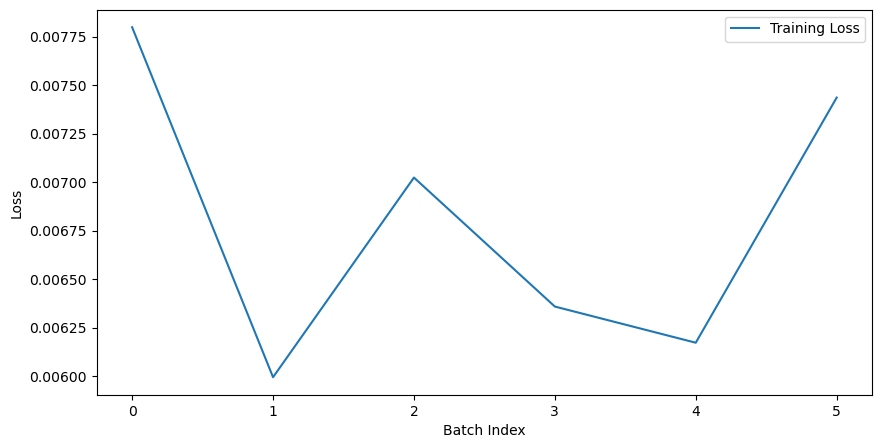

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Batch Index')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [20]:
# Evaluate the model on the test set
correct = 0
total = 0

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10,000 test images: {accuracy:.2f}%')

Accuracy of the network on the 10,000 test images: 98.27%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [21]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
n_epochs = 10
train_losses = []

for epoch in range(n_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 250 == 249:  # print every 250 mini-batches
            print(f"[Epoch {epoch+1}, Batch {i+1}] loss: {running_loss / 250:.3f}")
            train_losses.append(running_loss / 250)
            running_loss = 0.0
    
    scheduler.step()

print("Finished Training")

[Epoch 1, Batch 250] loss: 0.007
[Epoch 1, Batch 500] loss: 0.006
[Epoch 1, Batch 750] loss: 0.007
[Epoch 2, Batch 250] loss: 0.008
[Epoch 2, Batch 500] loss: 0.006
[Epoch 2, Batch 750] loss: 0.006
[Epoch 3, Batch 250] loss: 0.007
[Epoch 3, Batch 500] loss: 0.006
[Epoch 3, Batch 750] loss: 0.006
[Epoch 4, Batch 250] loss: 0.006
[Epoch 4, Batch 500] loss: 0.007
[Epoch 4, Batch 750] loss: 0.007
[Epoch 5, Batch 250] loss: 0.006
[Epoch 5, Batch 500] loss: 0.007
[Epoch 5, Batch 750] loss: 0.006
[Epoch 6, Batch 250] loss: 0.007
[Epoch 6, Batch 500] loss: 0.007
[Epoch 6, Batch 750] loss: 0.006
[Epoch 7, Batch 250] loss: 0.006
[Epoch 7, Batch 500] loss: 0.006
[Epoch 7, Batch 750] loss: 0.006
[Epoch 8, Batch 250] loss: 0.006
[Epoch 8, Batch 500] loss: 0.007
[Epoch 8, Batch 750] loss: 0.006
[Epoch 9, Batch 250] loss: 0.007
[Epoch 9, Batch 500] loss: 0.006
[Epoch 9, Batch 750] loss: 0.006
[Epoch 10, Batch 250] loss: 0.006
[Epoch 10, Batch 500] loss: 0.006
[Epoch 10, Batch 750] loss: 0.006
Finishe

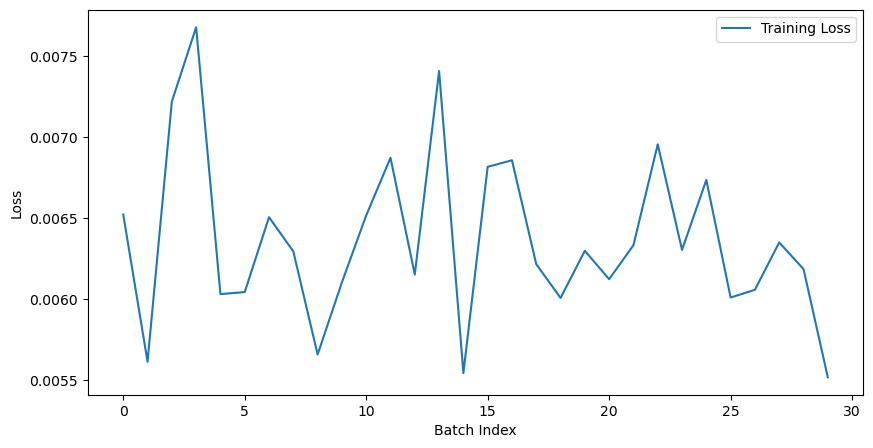

In [22]:
# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Batch Index')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
# Evaluate the improved model
correct = 0
total = 0

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the improved network on the 10,000 test images: {accuracy:.2f}%')

Accuracy of the improved network on the 10,000 test images: 98.29%


## Saving your model
Using `torch.save`, save your model for future loading.

In [29]:
import os
import torch

# Define the correct file path
model_path = '/home/ec2-user/SageMaker/model.pth'

# Save the model
torch.save(model.state_dict(), model_path)
# Save the improved model
torch.save(model.state_dict(), 'improved_model.pth')
print(f'Model saved to {model_path}')

Model saved to /home/ec2-user/SageMaker/model.pth


In [30]:
loaded_model = SimpleNN()
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval()  # Set the model to evaluation mode

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

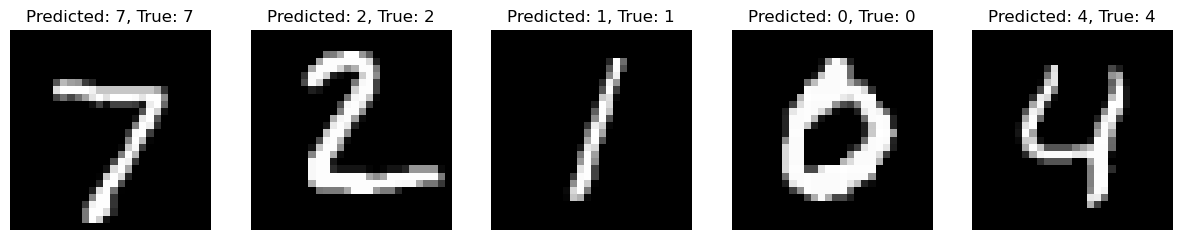

In [31]:
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Define a function to visualize sample test results
def visualize_results(model, test_loader, num_samples=5):
    # Get some sample test data
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    
    # Make predictions
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    
    # Plot the images along with the predicted and true labels
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        image = images[i].cpu().numpy().squeeze()
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Predicted: {predicted[i]}, True: {labels[i]}')
        axes[i].axis('off')
    plt.show()

# Visualize sample test results
visualize_results(model, test_loader)